In [157]:
import math
import numpy as np
import matplotlib.pyplot as plt

Para el circuito con $Z_L = 70 + 100j$ se obtuvieron:
Solución 1:
\begin{align}
&C_p = 2.42\;pF&
& L_s = 14.36\;nH \\
\end{align}
Solución 2:
\begin{align}
&L_p = 90\;nH&
&C_s = 1.7\;pF \\
\end{align}

In [158]:
Zo = 50
ZL = 70 + 100J
Cp = 2.417583811903537e-12
Ls = 1.436178892012369e-08
Lp = 9.005499699340681e-08
Cs = 1.7637284638748385e-12

Se tiene lo siguiente:
\begin{align*}
    &\text{Opción 1:}&
    &\text{Opción 2:} \\
    & Z_{in} = L_s\cdot \omega j + \left ( Z_L\;//\;\frac{-j}{\omega\cdot C_p} \right )&
    &Z_{in} = \frac{-j}{\omega\cdot C_s} + (Z_L\;//\;L_p\cdot \omega j)\\
\end{align*}

In [159]:
Zin_1 = lambda f: (Ls*2*math.pi*f*1J) + ((1/ZL)+(2*math.pi*f*Cp*(1J)))**-1
Zin_2 = lambda f: (-1J/(2*math.pi*f*Cs)) + ((1/ZL)+(1/(Lp*2*math.pi*f*1J)))**-1
r = lambda Zin: (Zin-Zo)/(Zin+Zo)
ROE = lambda r: (1+abs(r)) / (1-abs(r))
RL = lambda r: -20*np.log(abs(r))

#Chequeo que de 50 Ohms en 1GHz
print(Zin_1(1e9),Zin_2(1e9))

(50.00000000000001-1.4210854715202004e-14j) (50.00000000000001-2.842170943040401e-14j)


Hago barrido en frecuencia entre 900MHz y 1.1GHz

In [160]:
x = np.linspace(900*1e6, 1.1*1e9, 1000000)

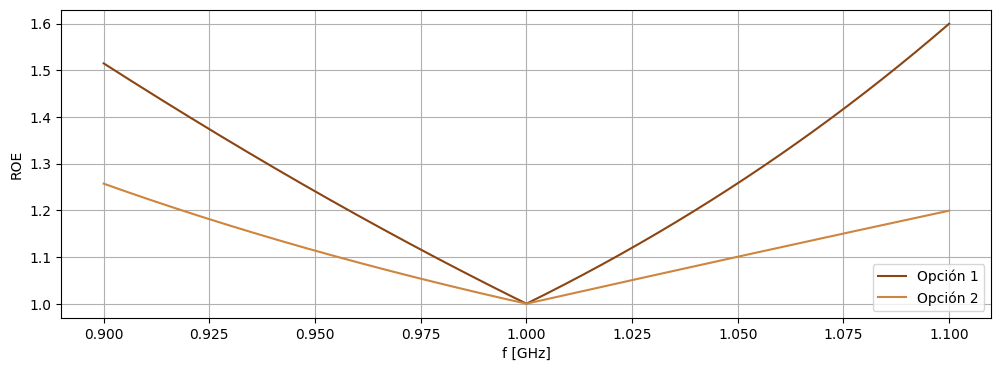

In [161]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, ROE(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, ROE(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("ROE")
plt.legend(loc="lower right")
plt.savefig("Ej1-Carga1_ROE")
plt.show()

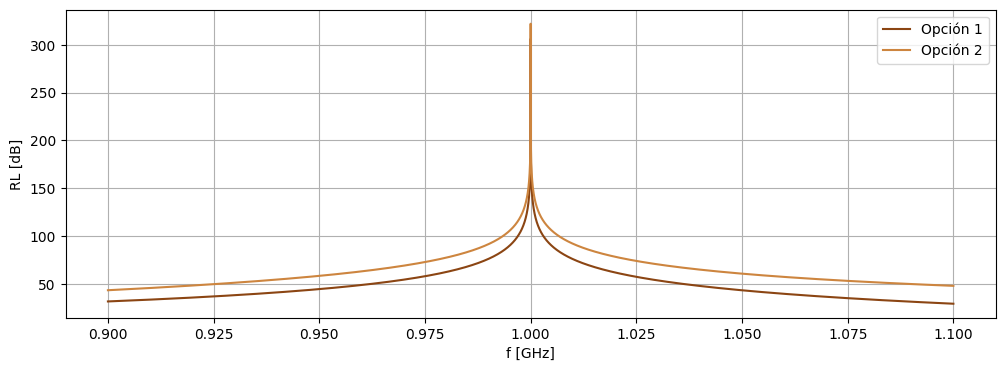

In [162]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, RL(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, RL(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("RL [dB]")
plt.legend(loc="upper right")
plt.savefig("Ej1-Carga1_RL")
plt.show()